In [14]:
import pypsa
import numpy as np
import networkx as nx

network = pypsa.Network()

In [15]:
# add three buses
n_buses = 3

for i in range(n_buses):
    network.add("Bus", "My bus {}".format(i), v_nom=20.0)

network.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
My bus 0,20.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
My bus 1,20.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
My bus 2,20.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,


In [16]:
# add three lines in a ring
for i in range(n_buses):
    network.add(
        "Line",
        "My line {}".format(i),
        bus0="My bus {}".format(i),
        bus1="My bus {}".format((i + 1) % 3),
        x=0.1,
        r=0.01,
    )

network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
My line 0,My bus 0,My bus 1,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My line 1,My bus 1,My bus 2,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My line 2,My bus 2,My bus 0,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# add a generator at bus 0
network.add("Generator", "My gen", bus="My bus 0", p_set=100, control="PQ")
network.add("Generator", "My other gen", bus="My bus 2", p_set=100, control="PQ")


network.generators

attribute,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
My gen,My bus 0,Slack,,0.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
My other gen,My bus 2,PQ,,0.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [18]:
# add a load at bus 1
network.add("Load", "My load", bus="My bus 1", p_set=100, q_set=100)

network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
My load,My bus 1,,,100.0,100.0,-1.0


In [59]:
network.loads.p_set=30
network.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.019929 seconds


{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         1.453060e-10,
 'converged': SubNetwork     0
 snapshot        
 now         True}

In [58]:
network.generators.p_nom_max=100
network.generators

attribute,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
My gen,My bus 0,Slack,,100,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
My other gen,My bus 2,PQ,,100,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [60]:
network.generators_t.p

Generator,My gen,My other gen
snapshot,,
now,-69.692496,100.0


In [26]:
network.lines_t.p0

,My line 0,My line 1,My line 2
snapshot,,,
now,66.897487,-33.333333,-33.391038


In [21]:
network.buses_t.v_ang * 180 / np.pi

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,0.0,-0.875939,-0.433813


In [22]:
network.buses_t.v_mag_pu

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,1.0,0.981199,0.99057


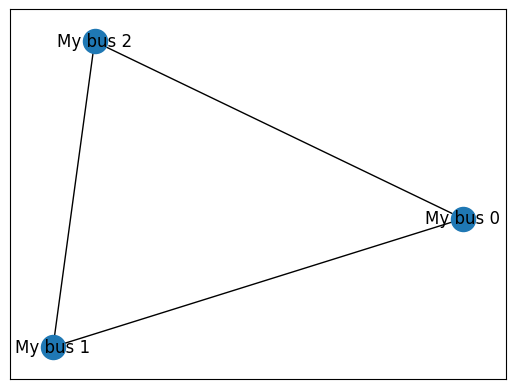

In [24]:
G=network.graph()
nx.draw_networkx(G)